In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['axes.grid'] = False
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

In [4]:
import time
from data_process import *
from Utils.utils import frange

## Testing with sinx

In [24]:
train_df, test_df = get_stock_data('sinx', 0.8)
all_actions = {0:'hold', 1:'buy', 2:'sell'}
windows = [] #20, 40
# max_num_units = 1
train_df = create_df(train_df, windows)
# price_states_value, price_roc_states_value, fisher_states_value = get_states(train_df)
price_states_value, fisher_states_value = get_states(train_df)
# train_df = create_state_df(train_df, price_states_value, price_roc_states_value, fisher_states_value)
# all_states = get_all_states(price_states_value, price_roc_states_value, fisher_states_value)
train_df = create_state_df(train_df, price_states_value, fisher_states_value)
all_states = get_all_states(price_states_value, fisher_states_value)  #, max_num_units
states_size = len(all_states)
test_df = create_df(test_df, windows)
test_df = create_state_df(test_df, price_states_value, fisher_states_value)

In [25]:
10*2*3.14

62.800000000000004

# Train with single episode

In [26]:
np.random.seed(12)
q = initialize_q_mat(all_states, all_actions)/1e9
print('Initializing q')
print(q[:3])


Initializing q
                   0             1             2
states                                          
0       1.541628e-19  7.400497e-19  2.633150e-19
1       5.337394e-19  1.457496e-20  9.187470e-19
2       9.007149e-19  3.342143e-20  9.569493e-19


In [47]:
train_data = train_df[['Normalized_Close', 'state']]
q, train_actions_history, train_returns_since_entry, _ = train_q_learning(train_data, q, states_size,  use_nn=False, alpha=0.4, gamma=0.1, episodes=10, theta=1)   #max_num_units,

 10%|█         | 1/10 [00:01<00:12,  1.36s/it]

invested capital 31.04475851700037, return/invest ratio -1.4267246608977082


 20%|██        | 2/10 [00:02<00:10,  1.33s/it]

invested capital 88.02910908707138, return/invest ratio -11.369153213524891


 30%|███       | 3/10 [00:03<00:09,  1.30s/it]

invested capital 82.52285897643993, return/invest ratio -10.668302794080763


 40%|████      | 4/10 [00:05<00:07,  1.23s/it]

invested capital 74.43220269121214, return/invest ratio -19.245020381530537


 50%|█████     | 5/10 [00:06<00:05,  1.20s/it]

invested capital 74.43220269121214, return/invest ratio -18.805453957897942


 60%|██████    | 6/10 [00:07<00:05,  1.28s/it]

invested capital 71.8388669131755, return/invest ratio -8.515618977976551


 70%|███████   | 7/10 [00:08<00:03,  1.21s/it]

invested capital 163.23546083431546, return/invest ratio -11.404565513907624


 80%|████████  | 8/10 [00:09<00:02,  1.19s/it]

invested capital 214.2980639854898, return/invest ratio -8.322899406463529


 90%|█████████ | 9/10 [00:11<00:01,  1.19s/it]

invested capital 61.82058232439827, return/invest ratio -16.822855978808136


100%|██████████| 10/10 [00:12<00:00,  1.23s/it]

invested capital 57.080794871944576, return/invest ratio -12.705305744617146
End of Training!


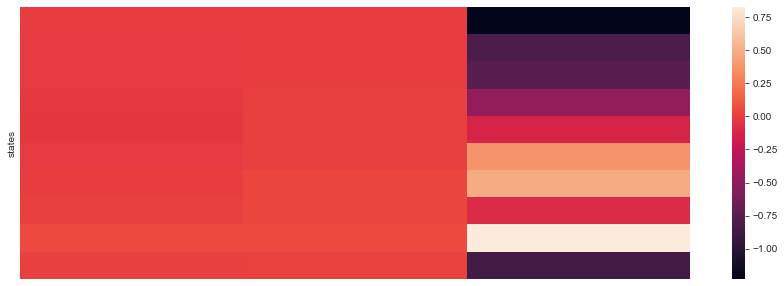

In [48]:
sns.heatmap(data=q, xticklabels=False, yticklabels=False)
plt.show()


invested capital 57.080794871944576, return/invest ratio -12.705305744617146
base return/invest ratio -0.39976855478547146


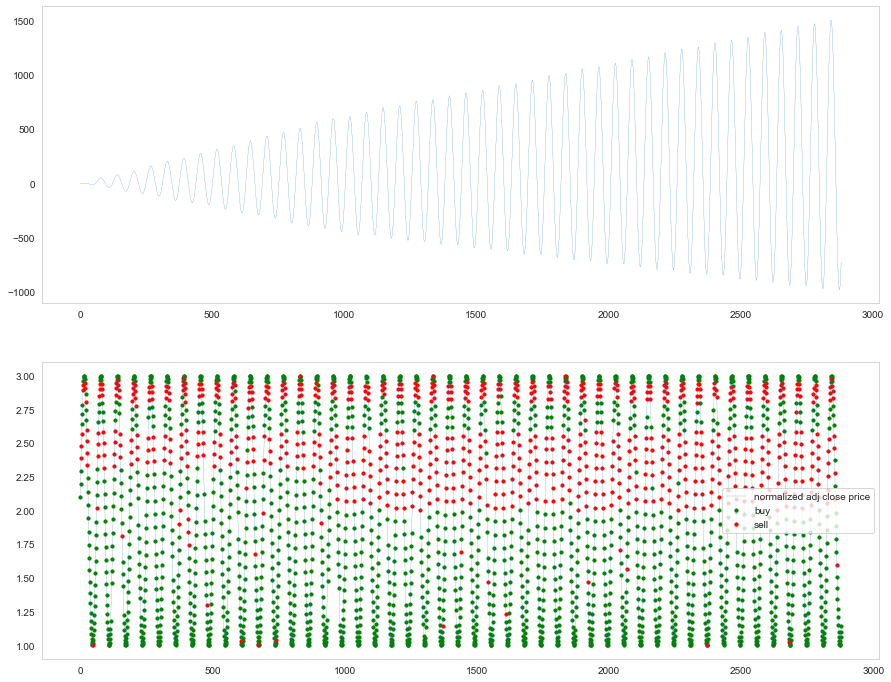

In [49]:
visualize_results(train_actions_history, train_returns_since_entry)
get_invested_capital(train_actions_history, train_returns_since_entry)
print('base return/invest ratio {}'.format(get_base_return(np.array(train_data))))

## Test evaluation

In [50]:
test_data = np.array(test_df[['Normalized_Close', 'state']])
test_actions_history, test_returns_since_entry = eval_q_learning(test_data, q)

invested capital 44.004884604001845, return/invest ratio 6.843739481455776
base return/invest ratio 1.280447262042161


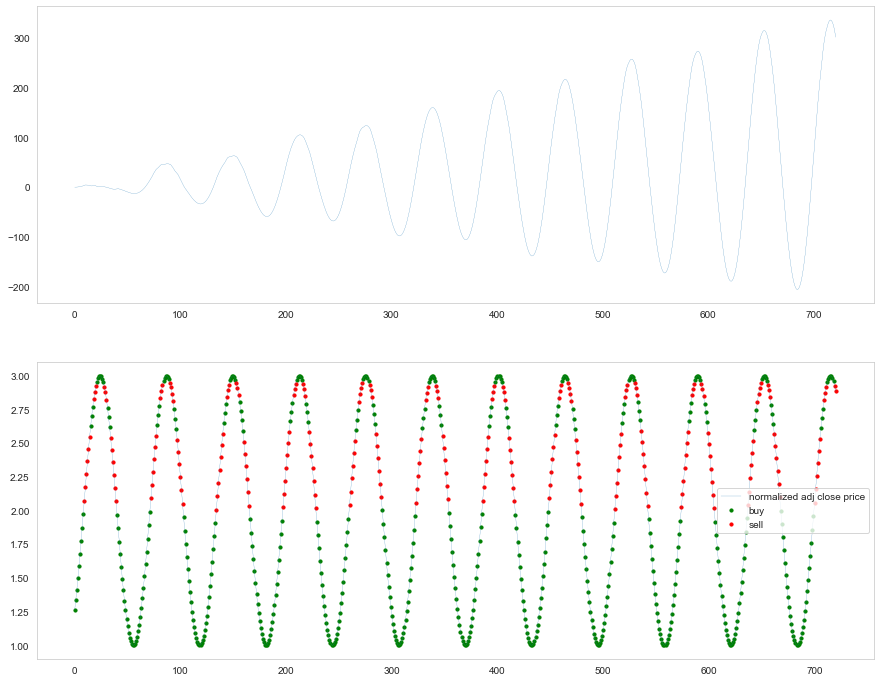

In [51]:
visualize_results(test_actions_history, test_returns_since_entry)
get_invested_capital(test_actions_history, test_returns_since_entry)
# print('invested capital {}, return/invest ratio {}'.format(invested_capital, return_invest_ratio))
print('base return/invest ratio {}'.format(get_base_return(test_data)))

# Train with different number of training episode


In [ ]:
train_return_invest_ratios = []
test_return_invest_ratios = []

np.random.seed(12)
q = initialize_q_mat(all_states, all_actions)/1e9

for e in range(10):

    # train
    train_data = train_df[['Normalized_Close', 'state']]
    q, train_actions_history, train_returns_since_entry, _ = train_q_learning(train_data, q, num_features, use_nn=False, alpha=0.8, gamma=0.95, episodes=100, theta=1)

    # print train results
    print('Training Results:')
    train_return_invest_ratio = get_invested_capital(train_actions_history, train_returns_since_entry)
    train_return_invest_ratios.append(train_return_invest_ratio)
    print('base return/invest ratio {}'.format(get_base_return(train_data)))

    # test
    print('Test Results:')
    test_actions_history, test_returns_since_entry = eval_q_learning(test_data, q)
    test_return_invest_ratio = get_invested_capital(test_actions_history, test_returns_since_entry)
    test_return_invest_ratios.append(test_return_invest_ratio)
    print('base return/invest ratio {}'.format(get_base_return(test_data)))


In [ ]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(8,8))
x = [i+1 for i in range(10)]
ax1.plot(x, train_return_invest_ratios, label='train', color='green');
ax2.plot(x, test_return_invest_ratios, label='test');
ax1.legend(loc=2);
ax2.legend(loc=2);
plt.xlabel('Train episode');
plt.ylabel('Return/Invest Ratio');

# Train with different action thresholds

In [ ]:
train_return_invest_ratios = []
test_return_invest_ratios = []
alphas =frange(0.01,0.1,0.01)

In [ ]:
for a in alphas:
    np.random.seed(12)
    q = initialize_q_mat(all_states, all_actions)/1e9

    # train
    train_data = train_df[['Normalized_Close', 'state']]
    q, train_actions_history, train_returns_since_entry, _ = train_q_learning(train_data, q, num_features, use_nn=False, alpha=a, gamma=0.95, episodes=10, theta=1)

    # print train results
    print('Training Results:', end='')
    train_return_invest_ratio = get_invested_capital(train_actions_history, train_returns_since_entry)
    train_return_invest_ratios.append(train_return_invest_ratio)

    # test
    print('Test Results:', end='')
    test_actions_history, test_returns_since_entry = eval_q_learning(test_data, q)
    test_return_invest_ratio = get_invested_capital(test_actions_history, test_returns_since_entry)
    test_return_invest_ratios.append(test_return_invest_ratio)


In [ ]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(8,8))
ax1.plot(alphas, train_return_invest_ratios, label='train', color='green');
ax2.plot(alphas, test_return_invest_ratios, label='test');
ax1.legend(loc=2);
ax2.legend(loc=2);
plt.xlabel('alpha');
plt.ylabel('Return/Invest Ratio');

# Train with different Gammas

In [ ]:
train_return_invest_ratios = []
test_return_invest_ratios = []
gammas = [i*0.05 for i in range(3, 20)]

In [ ]:

for g in gammas:
    np.random.seed(12)
    q = initialize_q_mat(all_states, all_actions)/1e9

    # train
    train_data = train_df[['Normalized_Close', 'state']]
    q, train_actions_history, train_returns_since_entry, _ = train_q_learning(train_data, q, num_features, use_nn=False, alpha=0.4, gamma=g, episodes=10, theta=1)

    # print train results
    print('Training Results:', end='')
    train_return_invest_ratio = get_invested_capital(train_actions_history, train_returns_since_entry)
    train_return_invest_ratios.append(train_return_invest_ratio)

    # test
    print('Test Results:', end='')
    test_actions_history, test_returns_since_entry = eval_q_learning(test_data, q)
    test_return_invest_ratio = get_invested_capital(test_actions_history, test_returns_since_entry)
    test_return_invest_ratios.append(test_return_invest_ratio)

In [ ]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(8,8))
ax1.plot(gammas, train_return_invest_ratios, label='train', color='green');
ax2.plot(gammas, test_return_invest_ratios, label='test');
ax1.legend(loc=2);
ax2.legend(loc=2);
plt.xlabel('alpha');
plt.ylabel('Return/Invest Ratio');

The best return/invest ratio peak at alpha=0.3.

## Visualize test results with best parameters.
alpha=0.3<br>
training_episode=4

In [ ]:
# get the best q
start = time.time()
np.random.seed(12)
q = initialize_q_mat(all_states, all_actions)/1e9

# train
train_data = np.array(train_df[['Normalized_Close', 'state']])
q, train_actions_history, train_returns_since_entry = train_q_learning(train_data, q, alpha=0.3, gamma=0.95, episodes=4)
end = time.time()
print('Model trained in {:.3f}s'.format(end-start))

In [ ]:
test_actions_history, test_returns_since_entry = eval_q_learning(test_data, q)
visualize_results(test_actions_history, test_returns_since_entry)
get_invested_capital(test_actions_history, test_returns_since_entry)
# print('invested capital {}, return/invest ratio {}'.format(invested_capital, return_invest_ratio))
print('base return/invest ratio {}'.format(get_base_return(test_data)))

